# IML Assignment 1

## Name: Alexandra Vabnits


## Mail: a.vabnits@innopolis.university


## Group: B22-DS-01

## Task 1

### 3.1. Linear Regression
#### Data reading

In [589]:
import pandas as pd

df = pd.read_csv('train_1.csv')
df.head(10)

,Unnamed: 0,X_1,X_2,X_3,X_4,y
0,0,-1.924727,0.267947,0.596127,-1.150032,-5.195673
1,1,0.545333,-0.745503,2.773248,-0.975761,-20.118000
2,2,-1.833045,0.142620,-1.061453,-1.019242,0.630503
3,3,-1.297052,-0.857997,2.815755,-1.334396,-31.195297
4,4,-0.864305,-2.116955,6.347915,1.140341,-272.137746
5,5,1.795687,1.973620,-5.113603,-1.471940,127.632033
6,6,0.830451,2.417875,-7.219955,-1.808982,363.770821
7,7,0.205811,-0.370026,0.615315,-1.550593,-5.382155
8,8,-2.354931,1.026102,-2.882725,1.706066,20.446527
9,9,1.168741,-0.392934,0.858668,-1.509019,-3.181579


#### Train\validation splitting

In [590]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['y', 'Unnamed: 0'])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,X_1,X_2,X_3,X_4
79,-1.507101,0.685065,-1.195848,1.661516
197,-0.862325,-1.020685,2.016208,-2.297696
38,-1.979905,-1.685421,6.471406,-0.874245
24,-0.271208,-2.033052,6.338887,-0.265373
122,1.224786,0.460604,-0.982280,-0.042637
...,...,...,...,...
106,2.207771,1.761330,-6.248523,-1.386208
14,1.833243,2.476781,-6.643736,1.860258
92,2.271597,0.345551,-1.301237,0.815917
179,0.853249,-2.429690,7.440760,0.521445


#### Linear regression model fitting

In [591]:
from sklearn.linear_model import LinearRegression

# Declare and train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prediction by model on the validation set
y_pred_lr = linear_model.predict(X_test)

#### Linear regression model prediction & Evaluation


In [592]:
from sklearn import metrics
import numpy as np


# Print MSE, RMSE, MAE and R2 score
def print_metrics(y_actual, y_pred):
    print('Mean Squared Error:', metrics.mean_squared_error(y_actual, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_actual, y_pred))
    print('R2 Score:', metrics.r2_score(y_actual, y_pred))


print_metrics(y_test, y_pred_lr)

Mean Squared Error: 5682.794445664435
Root Mean Squared Error: 75.38431166804162
Mean Absolute Error: 62.894718208198945
R2 Score: 0.8560711773282678


### 3. 2 Polynomial Regression
#### Constructing the polynomial regression pipeline

In [593]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [594]:
pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])

#### Tuning the degree hyperparameter using GridSearch

In [595]:
from sklearn.model_selection import GridSearchCV

# Declare a GridSearch instance 
search = GridSearchCV(pipeline,
                      scoring='neg_mean_squared_error',
                      param_grid={'polynomial_features__degree': range(2, 6)},
                      cv=8)

# Train the GridSearch
search.fit(X_train, y_train)

print(f"Best parameter: {search.best_params_}")
print(f"Search score: {search.best_score_}")

Best parameter: {'polynomial_features__degree': 4}
Search score: -0.6219819548651347


In [596]:
print_metrics(y_test, search.predict(X_test))

Mean Squared Error: 0.17244822426682638
Root Mean Squared Error: 0.4152688578100053
Mean Absolute Error: 0.3215379748633917
R2 Score: 0.9999956323829539


#### Save the model

In [597]:
import pickle

# Save the GridSearch model for evaluation
filename = 'poly_optimized_model.sav'
pickle.dump(search, open(filename, 'wb'))

### 3.3 Determine the linear dependent features

Use the following code cell to determine a pair of features from the training dataset that are correlated to each other. Explain your choise in the markdown cell.

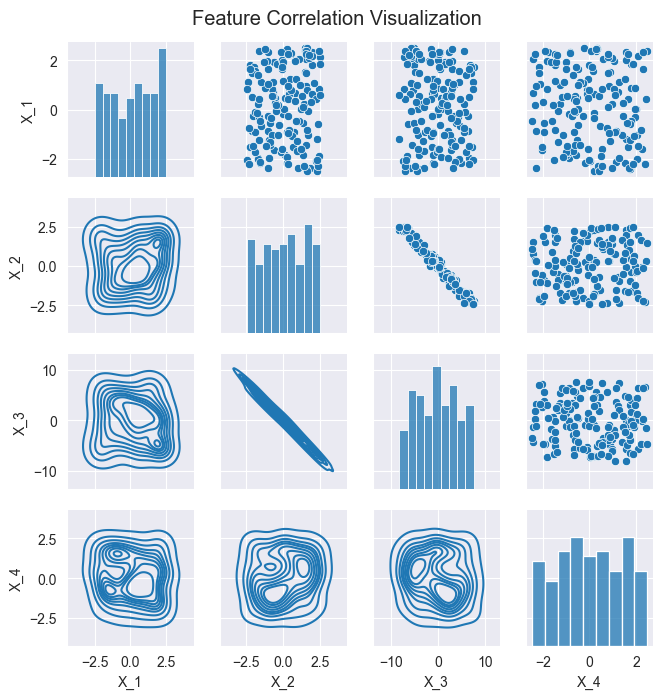

In [598]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dataframe from the training set and a PairGrid object
df = pd.DataFrame(X_train, columns=['X_1', 'X_2', 'X_3', 'X_4'])

g = sns.PairGrid(df, height=1.7, aspect=1)

# Map the plots to the locations
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

plt.suptitle('Feature Correlation Visualization', y=1.02, fontsize='x-large')

plt.show()

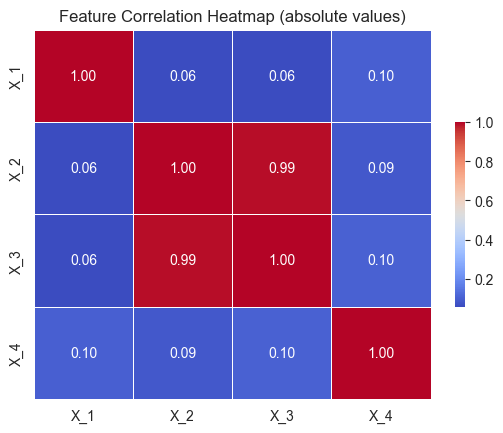

In [599]:
# heatmap of correlation
sns.heatmap(df.corr().abs(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f",
            cbar_kws={"shrink": .5})

plt.title('Feature Correlation Heatmap (absolute values)')
plt.show()


<font>By looking at the heatmap, we can see that x2 and x3 are highly correlated. The correlation coefficient is 0.99. This means that x2 and x3 are almost linearly dependent. 

Feature visualization by PairGrid also shows that x2 and x3 are linearly dependent as the scatter plot of x2 and x3 shows a linear relationship between them with negative slope.</font>

## Task 2

### 4.1 Data processing
#### Loading the dataset

In [600]:
import pandas as pd

#### Exploring the dataset  and removing 2 redundant features

In [601]:
# Load the dataset
df = pd.read_csv('pokemon_modified.csv')

In [602]:
# Explore the dataset
df.info()
# find the columns with non-numeric values
print('type object:', df.select_dtypes(include='object').columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

In [603]:
# Look at values of suspected columns
df[['name', 'classification', 'type1', 'is_legendary']].head()

,name,classification,type1,is_legendary
0,Bulbasaur,Seed Pokémon,grass,0
1,Ivysaur,Seed Pokémon,grass,0
2,Venusaur,Seed Pokémon,grass,0
3,Charmander,Lizard Pokémon,fire,0
4,Charmeleon,Flame Pokémon,fire,0


In [604]:
df[['name', 'classification', 'type1']].describe()

,name,classification,type1
count,801,801,801
unique,801,588,17
top,Bulbasaur,Dragon Pokémon,water
freq,1,8,114


In [605]:
# count number of legendary and non-legendary pokemons grouped by type1
df.groupby('type1')['is_legendary'].value_counts().unstack().sort_values(by=1, ascending=False)

is_legendary,0,1
type1,,
psychic,36.0,17.0
dragon,22.0,7.0
steel,18.0,6.0
water,108.0,6.0
electric,34.0,5.0
fire,47.0,5.0
grass,74.0,4.0
rock,41.0,4.0
bug,69.0,3.0


In [606]:
# count percent and number of legendary pokemons grouped by classification
df.groupby('classification')['is_legendary'].value_counts().unstack().sort_values(by=1, ascending=False)

is_legendary,0,1
classification,,
Land Spirit Pokémon,NaN,4.0
Eon Pokémon,NaN,2.0
Order Pokémon,NaN,1.0
Rainbow Pokémon,NaN,1.0
Protostar Pokémon,NaN,1.0
...,...,...
Woolly Crab Pokémon,1.0,NaN
Worm Pokémon,2.0,NaN
Wrestling Pokémon,1.0,NaN


In [607]:
# remove 'name' and 'classification' columns
df = df.drop(columns=['name'])
df = df.drop(columns=['classification'])

<font> The 'name' and 'classification' columns were removed because they are not useful for the model. 
The 'name' column is unique for each pokemon and does not provide any information about the pokemon's legendary status. 
The 'classification' column appears to be an additional subdivision of the 'type1' column, containing 588 unique classes on 801 rows of the dataset. We cannot obtain meaningfull probability of a specific 'classification' column class to be legendary or not due to inefficient sample size per class. That way, 'classification' column is not usefull in estimating the model. </font>

#### Splitting the data
Use random_state = 123, stratify, and set test_size = 0.2

In [608]:
from sklearn.model_selection import train_test_split

# split into features and target
X = df.drop(['is_legendary'], axis=1)
y = df['is_legendary']

# count percent of legendary pokemons in the whole dataset
print('% of legendary pokemons in the whole dataset:', sum(y == 1) / len(X))

# split into test and train sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

% of legendary pokemons in the whole dataset: 0.08739076154806492


In [609]:
print('% of legendary pokemons in train set:', sum(y_train == 1) / len(X_train))
print('% of legendary pokemons in validation set:', sum(y_val == 1) / len(X_val))

% of legendary pokemons in train set: 0.0875
% of legendary pokemons in validation set: 0.08695652173913043


Check if the dataset is balanced or not and comment on it
<font> The dataset appears to be imbalanced, since amount of legendary pokemons is only 8,7%.
The distribution of classes was preserved in train and test sets by using parameter 'stratify'. </font>

#### Checking for missing values

In [610]:
# find the columns with missing values
print('null values:', X_train.columns[X_train.isnull().any()])
print('null values:', X_val.columns[X_val.isnull().any()])

null values: Index(['height_m', 'percentage_male', 'weight_kg'], dtype='object')
null values: Index(['height_m', 'percentage_male', 'weight_kg'], dtype='object')


#### Impute the missing values

In [611]:
from sklearn.impute import SimpleImputer

# Define a SimpleImputer instance
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer
imputer.fit(X_train)
X_train = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)

#### Double check that there are no missing values

In [612]:
print('null values in train set:', X_train.columns[X_train.isnull().any()])
print('null values in validation set:', X_val.columns[X_val.isnull().any()])

null values in train set: Index([], dtype='object')
null values in validation set: Index([], dtype='object')


#### Encode categorically

In [613]:
from sklearn.preprocessing import OneHotEncoder


# function for transforming needed features with encoder
def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    # create dataframe from encoded features with named columns
    new_cols = pd.DataFrame(new_feats, columns=encoder.get_feature_names_out(features_name))
    new_df = pd.concat([df, new_cols], axis=1)
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df


# Using OneHotEncoder encode classification and type1
encoder = OneHotEncoder(sparse_output=False)
names = ['type1']

# Fit and apply the encoder
encoder.fit(X_train[names])
X_train = ohe_new_features(X_train, names, encoder)
X_val = ohe_new_features(X_val, names, encoder)

In [614]:
# check for new encoded features
X_train.filter(regex='^type1_').head()

,type1_bug,type1_dark,type1_dragon,type1_electric,type1_fairy,type1_fighting,type1_fire,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Scale the data

In [615]:
from sklearn.preprocessing import MinMaxScaler

# Define a scaler instance from one of the above
scaler = MinMaxScaler()

# Apply the scaler on both train and validation features
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_val

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,0.466667,0.466667,0.5,0.250,0.200000,0.125,0.200000,0.200000,0.50,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.200000,0.466667,0.5,0.125,0.200000,0.000,0.466667,0.466667,0.50,0.066667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.200000,0.200000,0.5,0.500,0.200000,0.250,0.066667,0.200000,0.25,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.200000,0.200000,0.5,0.250,0.200000,0.125,0.466667,0.466667,0.25,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.066667,0.200000,1.0,0.125,0.200000,0.125,0.066667,0.200000,0.25,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,0.200000,0.200000,0.5,0.500,0.200000,0.250,0.066667,0.200000,0.25,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
157,0.466667,0.466667,0.5,0.250,0.200000,0.250,0.200000,0.200000,0.00,0.200000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
158,0.200000,0.200000,0.5,0.000,0.200000,0.250,0.200000,0.200000,0.25,0.466667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159,0.066667,0.200000,0.5,0.250,0.066667,0.250,0.066667,0.200000,0.25,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### <span style="color:red">Correlation matrix</span>

Are there highly co-related features in the dataset? Is it a problem? Explain in the markdown cell.

<Axes: >

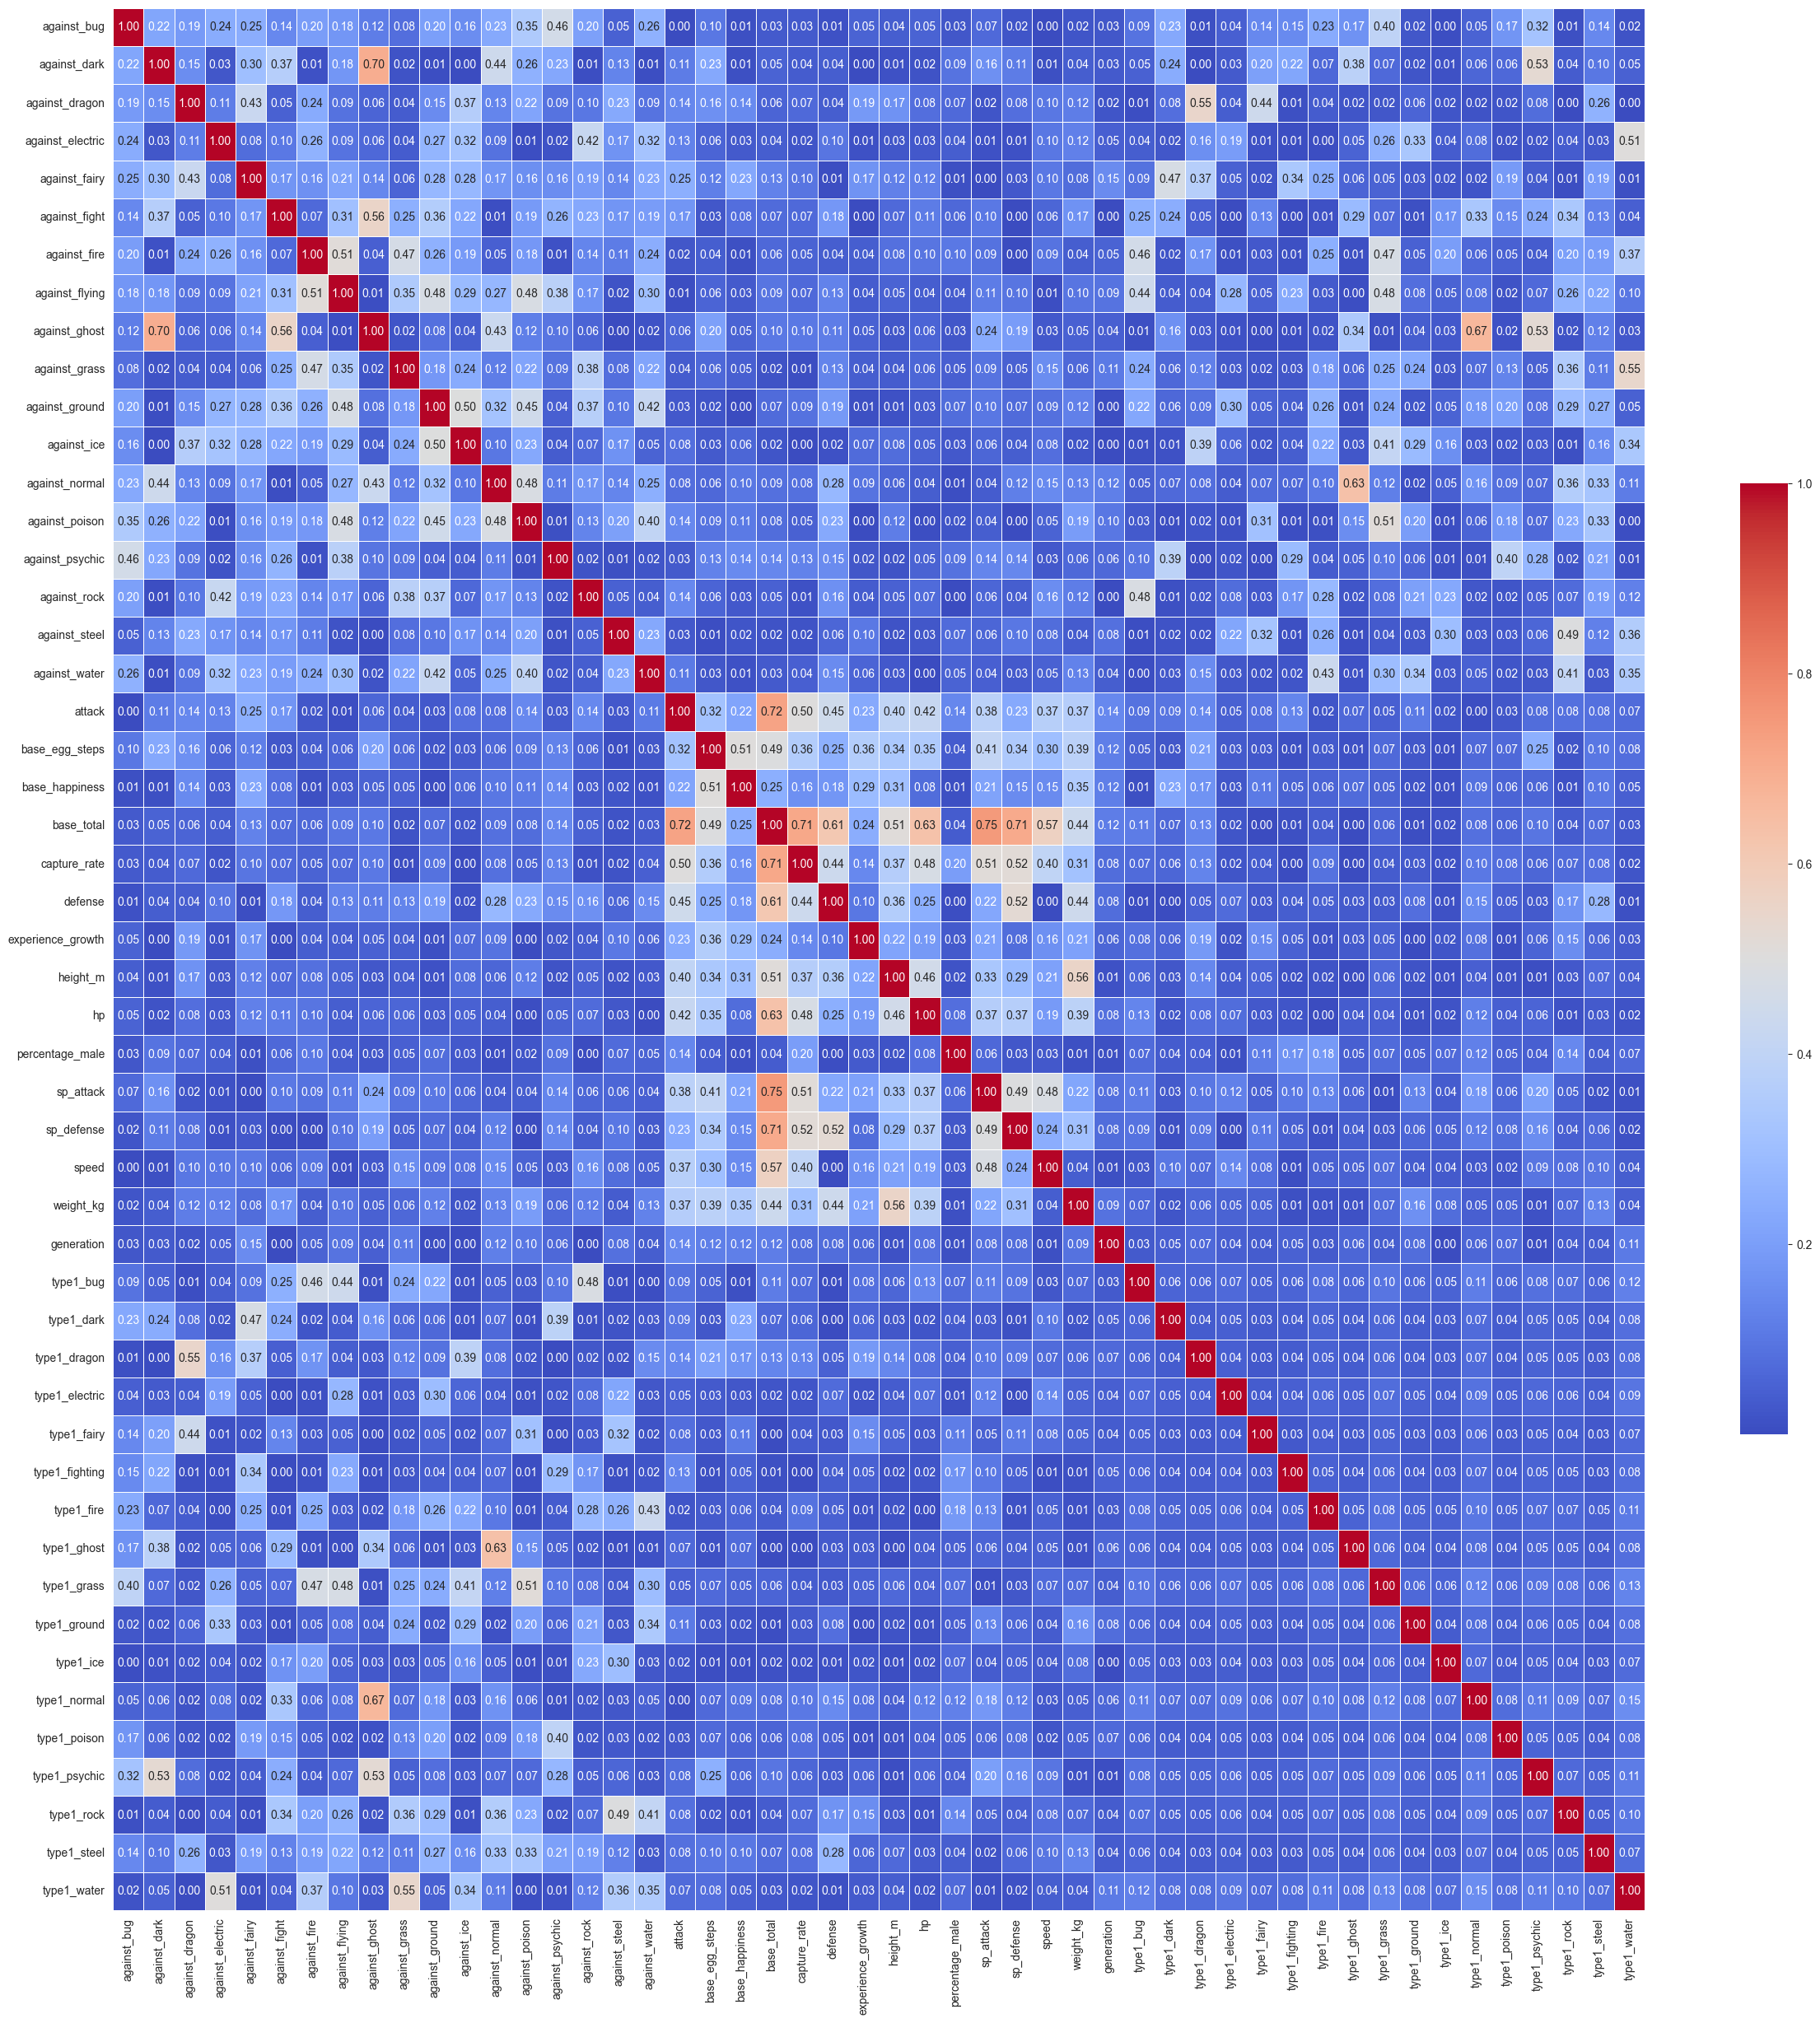

In [616]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))

# Plot the correlation matrix
sns.heatmap(X_train.corr().abs(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f",
            cbar_kws={"shrink": .5})

In [617]:
# find all pairs of highly correlated features >= 0.7
correlation_matrix = X_train.corr().abs()
correlation_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
correlation_matrix = correlation_matrix.unstack().reset_index()
correlation_matrix.columns = ['feature1', 'feature2', 'correlation']
correlation_matrix = correlation_matrix.dropna(subset=['correlation'])
correlation_matrix = correlation_matrix[round(correlation_matrix['correlation'], 2) >= 0.7]
correlation_matrix

,feature1,feature2,correlation
401,against_ghost,against_dark,0.695490
1068,base_total,attack,0.722850
1121,capture_rate,base_total,0.711196
1421,sp_attack,base_total,0.748548
1471,sp_defense,base_total,0.706025


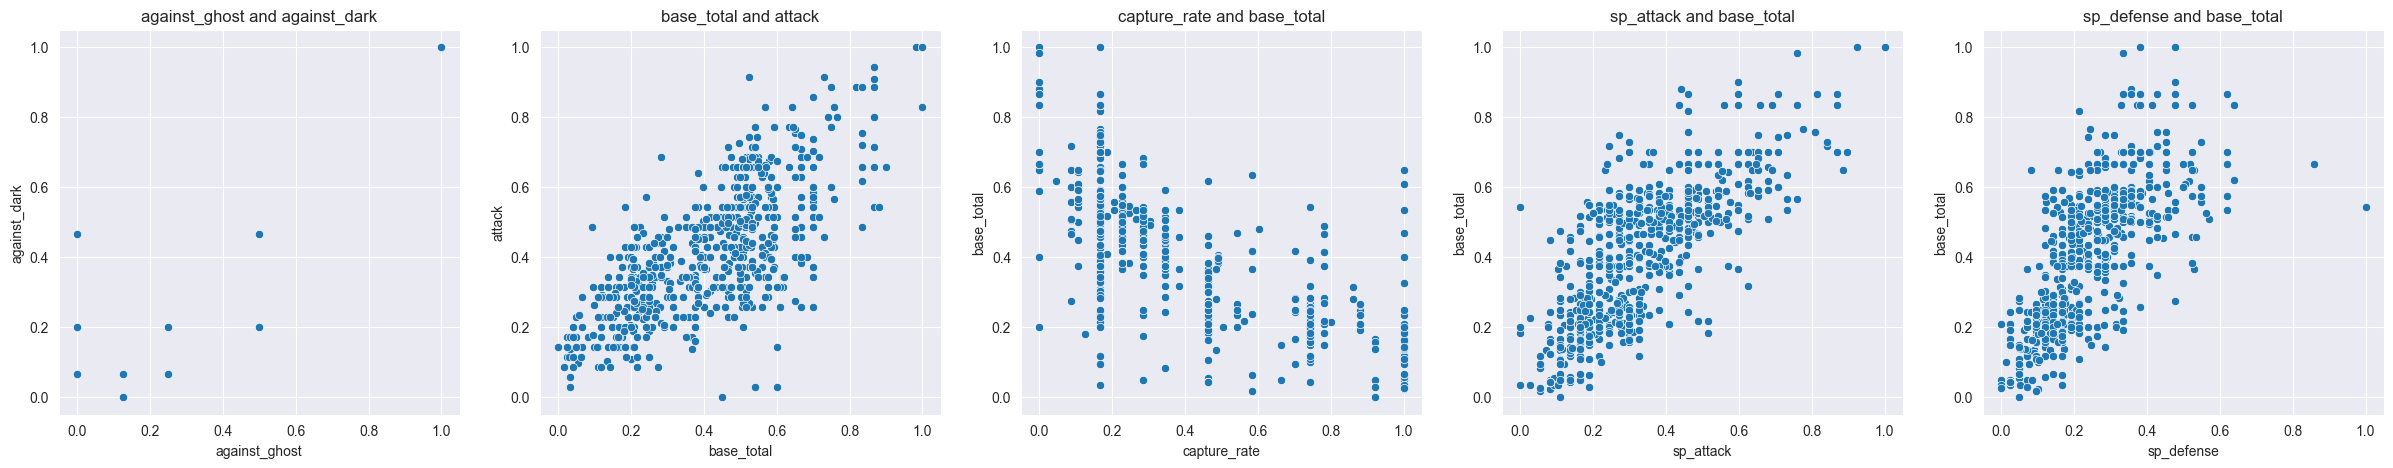

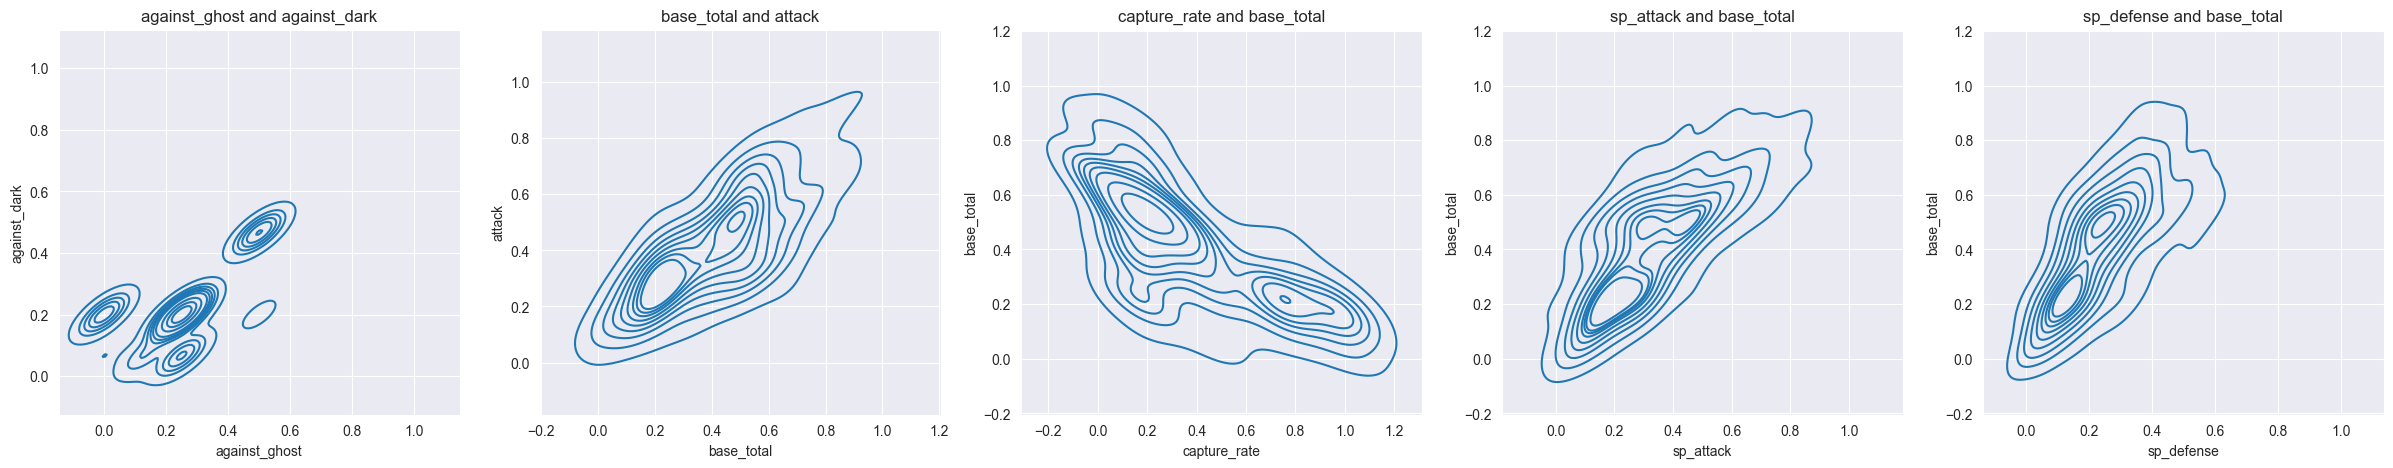

In [618]:
# draw plots of highly correlated features pairs from df
fig, axes = plt.subplots(1, 5, figsize=(30, 5))
for i, (index, row) in enumerate(correlation_matrix.iterrows()):
    sns.scatterplot(ax=axes[i], data=X_train, x=row['feature1'], y=row['feature2'])
    axes[i].set_title(f'{row["feature1"]} and {row["feature2"]}')
plt.show()

# draw kde plots
fig, axes = plt.subplots(1, 5, figsize=(30, 5))
for i, (index, row) in enumerate(correlation_matrix.iterrows()):
    sns.kdeplot(ax=axes[i], data=X_train, x=row['feature1'], y=row['feature2'])
    axes[i].set_title(f'{row["feature1"]} and {row["feature2"]}')
plt.show()

<font> By exploring data, we can see 5 pairs of relatively high correlated features. There are 4 features ('attack, 'capture_rate', 'sp_attack', 'sp_defence'), that depends on the 'base_total' feature. We can assume, these features are describing pokemon's combat charasteristics, therefore it is reasonable for them to be correlated. 
The relation between 'agains_ghost' and 'against_dark' seems to be determinied by small amount of possible pairs, as it is showen by the scatter plot.
It is reasonable to not remove these features, since the correlation is not fully linear, and it is usefull to explore these features in training the model further.</font>

### 4.2 Model fitting and Comparison

#### Tuning LR model

In [619]:
# Calculate and print classification metrics: accuracy, precision, recall, and F1 score 
def print_clf_metrics(y_actual, y_pred):
    print(f'Validation accuracy = {metrics.accuracy_score(y_actual, y_pred)}')  # 
    print(f'Validation precision = {metrics.precision_score(y_actual, y_pred)}')
    print(f'Validation recall = {metrics.recall_score(y_actual, y_pred)}')
    print(f'Validation F1-score = {metrics.f1_score(y_actual, y_pred)}')

In [620]:
# Specify GridSearchCV parameters
parameters = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3, 3, 7),
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

In [621]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Declare and train logistic regression inside GridSearchCV with the parameters above
# Set max_iter=1000 in LR constructor
lr_clf_gs = GridSearchCV(LogisticRegression(max_iter=1000), parameters, scoring='f1')
lr_clf_gs.fit(X_train, y_train)

C:\Users\sasha\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
70 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sasha\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sasha\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sasha\PycharmProjects\p

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='f1')

In [622]:
print("Tuned Hyperparameters :", lr_clf_gs.best_params_)
print("Accuracy :", lr_clf_gs.best_score_)

Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.9339047619047619


#### Construct a LR with the best params and Evaluate the LR with the best params

In [623]:
lr_clf = LogisticRegression(**lr_clf_gs.best_params_).fit(X_train, y_train)
lr_y_pred = lr_clf.predict(X_val)

In [624]:
print_clf_metrics(y_val, lr_y_pred)

Validation accuracy = 0.9937888198757764
Validation precision = 0.9333333333333333
Validation recall = 1.0
Validation F1-score = 0.9655172413793104


#### Print the top 5 most influencing features and the top 5 ignored features

In [625]:
coefs = lr_clf.coef_[0]
coefs_df = pd.DataFrame(coefs, index=X_train.columns, columns=['coefficient'])
coefs_df = coefs_df.reindex(coefs_df['coefficient'].abs().sort_values(ascending=False).index)
print('Top 5 most influencing features:\n', coefs_df.head(5), '\n')
print('Top 5 ignored features:\n', coefs_df.tail(5))

Top 5 most influencing features:
                    coefficient
base_egg_steps       13.504347
capture_rate        -10.607175
type1_normal         -9.615779
base_total            7.437696
experience_growth     6.932451 

Top 5 ignored features:
                  coefficient
against_ground           0.0
against_water            0.0
against_ice              0.0
against_psychic          0.0
against_bug              0.0


#### Tuning KNN model

In [626]:
from sklearn.neighbors import KNeighborsClassifier

# Declare and train knn inside GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 15)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'cosine']
}
knn_clf_gs = GridSearchCV(KNeighborsClassifier(), param_grid)
knn_clf_gs.fit(X_train, y_train)

print("Tuned Hyperparameters :", knn_clf_gs.best_params_)
print("Accuracy :", knn_clf_gs.best_score_)

Tuned Hyperparameters : {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy : 0.946875


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [627]:
knn_clf = KNeighborsClassifier(**knn_clf_gs.best_params_).fit(X_train, y_train)
knn_y_pred = knn_clf.predict(X_val)
print_clf_metrics(y_val, knn_y_pred)

Validation accuracy = 0.9751552795031055
Validation precision = 1.0
Validation recall = 0.7142857142857143
Validation F1-score = 0.8333333333333334


#### Fitting GNB to the data and evaluating on the test dataset

In [628]:
from sklearn.naive_bayes import GaussianNB

# Declare and train GaussianNB. No hyperparameters tuning 
gauss_nb_clf = GaussianNB().fit(X_train, y_train)
gauss_y_pred = gauss_nb_clf.predict(X_val)

print_clf_metrics(y_val, gauss_y_pred)

Validation accuracy = 0.9316770186335404
Validation precision = 0.56
Validation recall = 1.0
Validation F1-score = 0.717948717948718


#### Which metric is most appropriate for this task and why?

<font> The most appropriate metric for this task is F1-score. F1-score is the harmonic mean of precision and recall. It is a good metric for imbalanced datasets, as it takes into account both false positives and false negatives. In this case, the dataset is imbalanced, so F1-score is the most appropriate metric. 
Additionally, if we consider the task from the perspective of a player, we are interested in the recall metric, since a player would not want to miss a legendary pokemon, and recall minimises False Negatives (cases, where classifier would classifiy legendary pokemon as non-legendary). </font>

#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.


In [629]:
# repeat the metrics output for each classifier
print('Logistic Regression:')
print_clf_metrics(y_val, lr_y_pred)
print('\n')
print('KNN:')
print_clf_metrics(y_val, knn_y_pred)
print('\n')
print('GaussianNB:')
print_clf_metrics(y_val, gauss_y_pred)

Logistic Regression:
Validation accuracy = 0.9937888198757764
Validation precision = 0.9333333333333333
Validation recall = 1.0
Validation F1-score = 0.9655172413793104


KNN:
Validation accuracy = 0.9751552795031055
Validation precision = 1.0
Validation recall = 0.7142857142857143
Validation F1-score = 0.8333333333333334


GaussianNB:
Validation accuracy = 0.9316770186335404
Validation precision = 0.56
Validation recall = 1.0
Validation F1-score = 0.717948717948718


<Axes: title={'center': 'Metrics comparison'}>

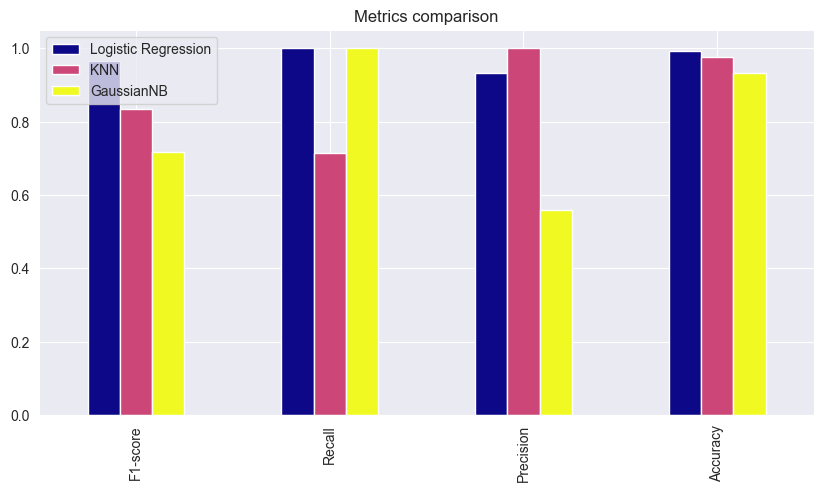

In [630]:
# print a plot of the metrics
metrics_df = pd.DataFrame({
    'Logistic Regression': [metrics.f1_score(y_val, lr_y_pred), metrics.recall_score(y_val, lr_y_pred),
                            metrics.precision_score(y_val, lr_y_pred), metrics.accuracy_score(y_val, lr_y_pred)],
    'KNN': [metrics.f1_score(y_val, knn_y_pred), metrics.recall_score(y_val, knn_y_pred),
            metrics.precision_score(y_val, knn_y_pred), metrics.accuracy_score(y_val, knn_y_pred)],
    'GaussianNB': [metrics.f1_score(y_val, gauss_y_pred), metrics.recall_score(y_val, gauss_y_pred),
                   metrics.precision_score(y_val, gauss_y_pred), metrics.accuracy_score(y_val, gauss_y_pred)]
}, index=['F1-score', 'Recall', 'Precision', 'Accuracy'])

metrics_df.plot(kind='bar', figsize=(10, 5), title='Metrics comparison', colormap='plasma', legend=True)

What is the best model for this task? Explain
<font> The best model for this task is Logistic Regression. It has 1.0 recall, which indicates 0 False Negatives, and the highest F1-score. Both of these metrics we have determined as the most important in the current task. Additionally, LR has the highest accuracy and close to the highest precision. All these factors makes the Logistic Regression the best overall model for the task. </font>

## 5. Bonus Task

#### Loading the Dataset

In [631]:
import pandas as pd
import warnings

train_data = pd.read_csv('bonus_train.csv')

test_data = pd.read_csv('bonus_test.csv')

train_data.head()

,var1,var2,var3,target
0,63.973548,2.726496,379.882305,2
1,10.906092,5.529845,207.272945,1
2,73.482382,2.739803,335.491727,1
3,28.937856,3.666386,226.279807,0
4,33.315477,5.540084,159.608987,0


In [632]:
# Split the data
X_train = train_data.drop(columns=['target'])
y_train = train_data['target']

X_test = test_data.drop(columns=['target'])
y_test = test_data['target']

print(X_train, y_train, X_test, y_test)

          var1      var2        var3
0    63.973548  2.726496  379.882305
1    10.906092  5.529845  207.272945
2    73.482382  2.739803  335.491727
3    28.937856  3.666386  226.279807
4    33.315477  5.540084  159.608987
..         ...       ...         ...
265  87.227771  3.738061  320.135382
266  -4.605994  3.688628  204.136303
267  44.178216  5.085936  198.365089
268   6.169277  3.328219  204.934675
269  -5.396278  4.021390  197.347533

[270 rows x 3 columns] 0      2
1      1
2      1
3      0
4      0
      ..
265    2
266    1
267    0
268    0
269    0
Name: target, Length: 270, dtype: int64           var1      var2        var3
0    26.052523  4.698298  239.765969
1    62.205061  4.373559  207.581273
2    11.390621  4.494386  244.578095
3    35.320556  2.731171  322.284266
4    53.508643  3.575985  247.902236
5    15.608017  3.441529  171.143617
6    34.033739  3.653252  216.465744
7    -2.157290  5.066110  123.714108
8    26.441097  3.839241  195.244416
9   -11.806370  3.91032

####  Plot the data using the pairplot in sns

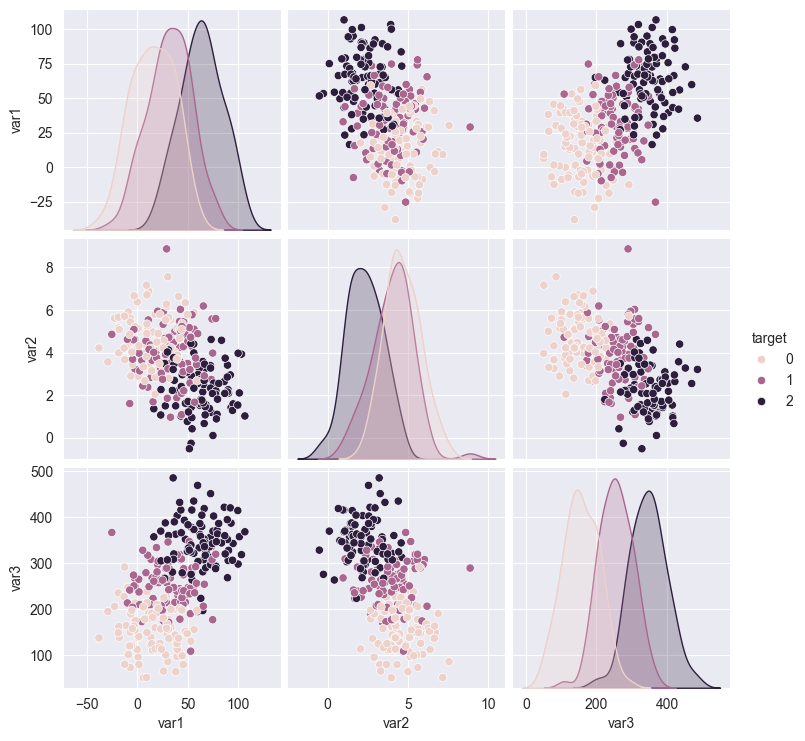

In [633]:
import seaborn as sns
import matplotlib.pyplot as plt

# print the pairplot
sns.pairplot(train_data, kind='scatter', hue='target')

#### Fit LR to the training dataset using OVR and evaluate on the test dataset

In [634]:
# fit the model
ovr_lr = LogisticRegression(multi_class='ovr').fit(X_train, y_train)

# predict on the test set and evaluate
ovr_y_pred = ovr_lr.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, ovr_y_pred))

Accuracy: 0.8


#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [635]:
# to ignore convergence warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # fit the model
    multi_lr = LogisticRegression(multi_class='multinomial').fit(X_train, y_train)

    # predict on the test set and evaluate
    multi_y_pred = multi_lr.predict(X_test)
    print('Accuracy:', metrics.accuracy_score(y_test, multi_y_pred))


Accuracy: 0.9


#### Using gridsearch to tune the C value and multi class

In [636]:
# define parameters
params = {
    'C': np.logspace(-10, 10, 7),
    'multi_class': ['ovr', 'multinomial']
}
# to ignore convergence warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # finetune the model using gridsearch
    grid_search_clf = GridSearchCV(LogisticRegression(), params, scoring='accuracy')
    grid_search_clf.fit(X_train, y_train)

In [637]:
print("Tuned Hyperparameters :", grid_search_clf.best_params_)
print("Accuracy :", grid_search_clf.best_score_)

Tuned Hyperparameters : {'C': 2154.4346900318865, 'multi_class': 'multinomial'}
Accuracy : 0.8481481481481481


Sum of all classes: 30


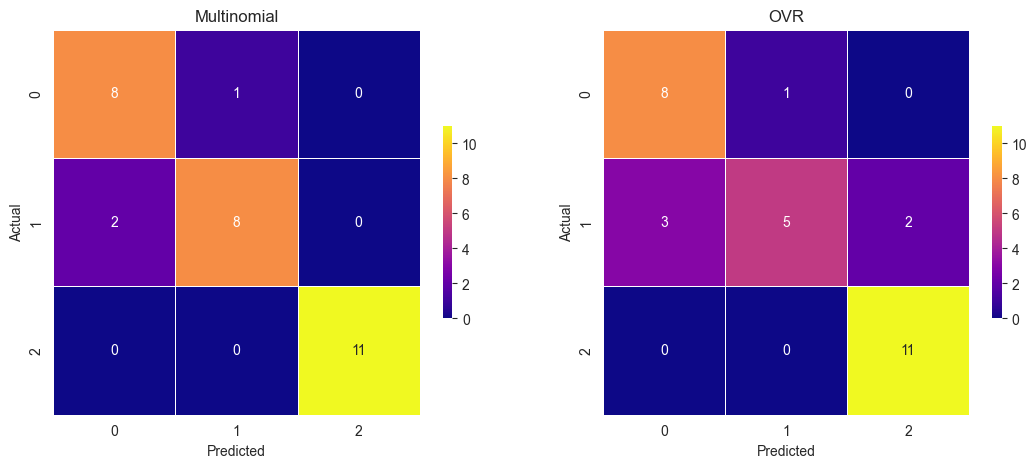

In [638]:
# draw confusion matrix for both models for classes
from sklearn.metrics import confusion_matrix
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
conf_matrix_multi = confusion_matrix(y_test, multi_y_pred)
sns.heatmap(conf_matrix_multi, annot=True, cmap='plasma', linewidths=0.5, fmt=".0f",
            cbar_kws={"shrink": .5}, ax=axes[0])
conf_matrix_ovr = confusion_matrix(y_test, ovr_y_pred)
sns.heatmap(conf_matrix_ovr, annot=True, cmap='plasma', linewidths=0.5, fmt=".0f",
            cbar_kws={"shrink": .5}, ax=axes[1])
axes[0].set_title('Multinomial')
axes[1].set_title('OVR')
# set axes names
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
# count sum of all classes
print('Sum of all classes:', conf_matrix_multi.sum())

plt.show()

#### Comment on why one multi_class technique was better than the other

<font> The multinomial technique has showed better performance than the OVR technique. 
The OVR technique creates a binary classifier for each class vs others, which can lead to imbalanced datasets and misclassification. 
As we can see, on a confusion matrix, OVR classifier shows lower accuracy than the Multinomial classifier specifically on the class between two other classes on the plane (it can be seen on the scatter plots). 
The multinomial technique, on the other hand, trains a single classifier for all classes, which has shown better accuracy overall. </font>

#### Create LR with the best params

In [639]:
# fit the model with the best params

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    multi_lr = LogisticRegression(**grid_search_clf.best_params_).fit(X_train, y_train)
    # predict on the test set and evaluate
    multi_y_pred = multi_lr.predict(X_test)
    print('Accuracy:', metrics.accuracy_score(y_test, multi_y_pred))



Accuracy: 0.9


#### Visualize the decision boundaries

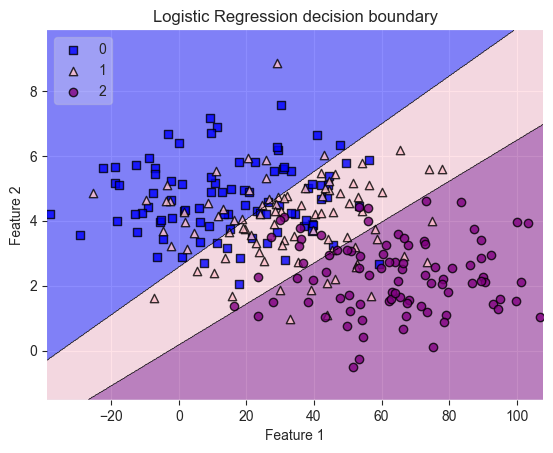

In [640]:
from mlxtend.plotting import plot_decision_regions

# choose two features
X_train1 = X_train[['var1', 'var2']]
X_test1 = X_test[['var1', 'var2']]

# fit the model on two features
multi_lr = LogisticRegression(**grid_search_clf.best_params_).fit(X_train1, y_train)

# to ignore user warning
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # plot the decision boundary
    plot_decision_regions(X_train1.values, y_train.values, clf=multi_lr, legend=2, colors='blue,pink,purple')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression decision boundary')
plt.show()

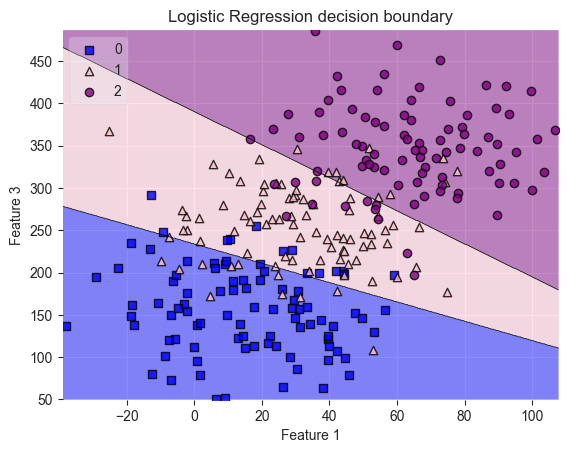

In [641]:
# choose two other features
X_train2 = X_train[['var1', 'var3']]
X_test2 = X_test[['var1', 'var3']]

# fit the model on two features
multi_lr = LogisticRegression(**grid_search_clf.best_params_).fit(X_train2, y_train)

# to ignore user warning
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # plot the decision boundary
    plot_decision_regions(X_train2.values, y_train.values, clf=multi_lr, legend=2, colors='blue,pink,purple')

plt.xlabel('Feature 1')
plt.ylabel('Feature 3')
plt.title('Logistic Regression decision boundary')
plt.show()

#### Comment on the decision boundary, do you think this is a good model or not? and based on what?
<font> The model have shown an acceptable accuracy, but by looking at the 2D projection plots of data, we can see, that the model is imperfect. Firstly, even in 2D, we can see, that the decision boundary is linear, which can indicate an underfitting. 
Secondly, in 3D the decision boundary would be represented as a straight plane, which may be even more inaccurate. It is possible, that the model does mot capture more complex pattern in the data. 
 More precise models, such as Support Vector Machines, could be more suitable for multiclass classification problems. </font>